# Лабороторная работа №2

## Загрузка датасета

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder

In [3]:
data = pd.read_csv("winemag-data_first150k.csv")

In [4]:
data.shape

(150930, 11)

In [5]:
data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [6]:
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
country - 0%
description - 0%
designation - 30%
points - 0%
price - 9%
province - 0%
region_1 - 17%
region_2 - 60%
variety - 0%
winery - 0%


## Обработка пропусков

In [7]:
data.dropna(subset = ['region_1'], inplace = True)

In [8]:
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
data.shape

Unnamed: 0 - 0%
country - 0%
description - 0%
designation - 32%
points - 0%
price - 9%
province - 0%
region_1 - 0%
region_2 - 52%
variety - 0%
winery - 0%


(125870, 11)

In [9]:
data.dropna(subset = ['designation'], inplace = True)

In [10]:
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
data.shape

Unnamed: 0 - 0%
country - 0%
description - 0%
designation - 0%
points - 0%
price - 10%
province - 0%
region_1 - 0%
region_2 - 54%
variety - 0%
winery - 0%


(85614, 11)

In [11]:
data.price.fillna(data.price.median(), inplace = True)

In [12]:
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
data.shape

Unnamed: 0 - 0%
country - 0%
description - 0%
designation - 0%
points - 0%
price - 0%
province - 0%
region_1 - 0%
region_2 - 54%
variety - 0%
winery - 0%


(85614, 11)

### Значение price заполнил медианными значениями

In [13]:
data.drop(columns=['region_2'], inplace=True) 
data.dropna(axis=1, how="any")

,Unnamed: 0,country,description,designation,points,price,province,region_1,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...
150923,150923,France,"Rich and toasty, with tiny bubbles. The bouque...",Demi-Sec,91,30.0,Champagne,Champagne,Champagne Blend,Jacquart
150924,150924,France,"Really fine for a low-acid vintage, there's an...",Diamant Bleu,91,70.0,Champagne,Champagne,Champagne Blend,Heidsieck & Co Monopole
150926,150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,Champagne Blend,H.Germain
150927,150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,White Blend,Terredora


### Описание колонки region_2 - Иногда в пределах винодельческой зоны указываются более конкретные регионы (например, Резерфорд в долине Напа), но иногда это значение может быть пустым
### Поэтому колонку region_2 удалил всю

### Итоговый результат обработки пропусков 

In [14]:
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
data.shape

Unnamed: 0 - 0%
country - 0%
description - 0%
designation - 0%
points - 0%
price - 0%
province - 0%
region_1 - 0%
variety - 0%
winery - 0%


(85614, 10)

### Внедрение значений

In [15]:
data = pd.read_csv("winemag-data_first150k.csv")
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
data.shape

Unnamed: 0 - 0%
country - 0%
description - 0%
designation - 30%
points - 0%
price - 9%
province - 0%
region_1 - 17%
region_2 - 60%
variety - 0%
winery - 0%


(150930, 11)

In [19]:
num_cols = []
total_count = data.shape[0]
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка price. Тип данных float64. Количество пустых значений 13695, 9.07%.


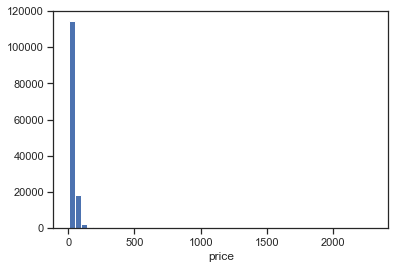

In [22]:
# Гистограмма по признакам
data_num = data[num_cols]
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [23]:
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [26]:
strategies=['mean', 'median', 'most_frequent']
test_num_impute_col(data, 'price', strategies[0])

('price', 'mean', 13695, 33.13148249353299, 33.13148249353299)

### Обработка пропусков в категориальных признаках

In [27]:
total_count = data.shape[0]
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка country. Тип данных object. Количество пустых значений 5, 0.0%.
Колонка designation. Тип данных object. Количество пустых значений 45735, 30.3%.
Колонка province. Тип данных object. Количество пустых значений 5, 0.0%.
Колонка region_1. Тип данных object. Количество пустых значений 25060, 16.6%.
Колонка region_2. Тип данных object. Количество пустых значений 89977, 59.62%.


In [28]:
cat_temp_data = data[['designation']]
cat_temp_data.head()

,designation
0,Martha's Vineyard
1,Carodorum Selección Especial Reserva
2,Special Selected Late Harvest
3,Reserve
4,La Brûlade


In [29]:
cat_temp_data['designation'].unique()

array(["Martha's Vineyard", 'Carodorum Selección Especial Reserva',
       'Special Selected Late Harvest', ..., 'Delaware Dolce',
       'Presidential 20-year old tawny', 'Bungalow Red'], dtype=object)

In [30]:
cat_temp_data[cat_temp_data['designation'].isnull()].shape

(45735, 1)

In [31]:
# Импьютация наиболее частыми значениями
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp = imp.fit_transform(cat_temp_data)
data_imp
np.unique(data_imp)

array(['"M"', '#50 Mon Chou', '#SocialSecret', ..., 'ía Crianza',
       'Župska', "‘Rough Justice' Red"], dtype=object)

# Кодирование категориальных признаков

In [32]:
cat_enc = pd.DataFrame({'designation1':data_imp.T[0]})
cat_enc

,designation1
0,Martha's Vineyard
1,Carodorum Selección Especial Reserva
2,Special Selected Late Harvest
3,Reserve
4,La Brûlade
...,...
150925,Reserve
150926,Cuvée Prestige
150927,Terre di Dora
150928,Grand Brut Rosé


### LabelEncoder

In [34]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['designation1'])

In [35]:
le.classes_

array(['"M"', '#50 Mon Chou', '#SocialSecret', ..., 'ía Crianza',
       'Župska', "‘Rough Justice' Red"], dtype=object)

In [36]:
cat_enc_le

array([17272,  4399, 25383, ..., 26593, 11569, 22308])

In [37]:
np.unique(cat_enc_le)

array([    0,     1,     2, ..., 30618, 30619, 30620])

In [39]:
le.inverse_transform([0, 1, 2, 3, 30618, 30619, 30620])

array(['"M"', '#50 Mon Chou', '#SocialSecret', "'72", 'ía Crianza',
       'Župska', "‘Rough Justice' Red"], dtype=object)

### OrdinalEncoder

In [40]:
data_oe = data[['designation', 'region_1', 'region_2']]
data_oe.head()

,designation,region_1,region_2
0,Martha's Vineyard,Napa Valley,Napa
1,Carodorum Selección Especial Reserva,Toro,NaN
2,Special Selected Late Harvest,Knights Valley,Sonoma
3,Reserve,Willamette Valley,Willamette Valley
4,La Brûlade,Bandol,NaN


In [41]:
imp4 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_oe_filled = imp4.fit_transform(data_oe)
data_oe_filled

array([["Martha's Vineyard", 'Napa Valley', 'Napa'],
       ['Carodorum Selección Especial Reserva', 'Toro', 'NA'],
       ['Special Selected Late Harvest', 'Knights Valley', 'Sonoma'],
       ...,
       ['Terre di Dora', 'Fiano di Avellino', 'NA'],
       ['Grand Brut Rosé', 'Champagne', 'NA'],
       ['NA', 'Alto Adige', 'NA']], dtype=object)

In [44]:
oe = OrdinalEncoder()
cat_enc_oe = oe.fit_transform(data_oe_filled)
cat_enc_oe

array([[1.7272e+04, 7.3900e+02, 8.0000e+00],
       [4.3990e+03, 1.0710e+03, 7.0000e+00],
       [2.5384e+04, 5.2800e+02, 1.4000e+01],
       ...,
       [2.6594e+04, 4.3400e+02, 7.0000e+00],
       [1.1569e+04, 1.9700e+02, 7.0000e+00],
       [1.8583e+04, 2.6000e+01, 7.0000e+00]])

In [46]:
np.unique(cat_enc_oe[:, 0])


array([0.0000e+00, 1.0000e+00, 2.0000e+00, ..., 3.0619e+04, 3.0620e+04,
       3.0621e+04])

In [47]:
np.unique(cat_enc_oe[:, 1])


array([0.000e+00, 1.000e+00, 2.000e+00, ..., 1.234e+03, 1.235e+03,
       1.236e+03])

In [48]:
np.unique(cat_enc_oe[:, 2])

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18.])

### Кодирование шкал порядка

In [53]:
sizes = ['XS', 'S', 'M', 'L', 'XS', 'M', 'S']

In [54]:
pd_sizes = pd.DataFrame(data={'sizes':sizes})
pd_sizes

,sizes
0,XS
1,S
2,M
3,L
4,XS
5,M
6,S


In [55]:
pd_sizes['sizes_codes'] = pd_sizes['sizes'].map({'XS':1, 'S':2, 'M':3, 'L':4})
pd_sizes

,sizes,sizes_codes
0,XS,1
1,S,2
2,M,3
3,L,4
4,XS,1
5,M,3
6,S,2


# Масштабирование данных

In [56]:
sc = StandardScaler()
sc_data = sc.fit_transform(data[['price']])

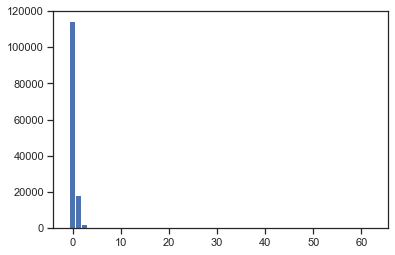

In [57]:
plt.hist(sc_data, 50)
plt.show()

### Z-оценка